In [1]:
import numpy as np
import pandas as pd

import torch
import torchvision
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

from matplotlib import pyplot as plt
%matplotlib inline

# Create type4 Train and Test data

In [2]:
# y = np.random.randint(0,10,5000)
# idx= []
# for i in range(10):
#     print(i,sum(y==i))
#     idx.append(y==i)

In [3]:
# x = np.zeros((5000,2))

# x[idx[0],:] = np.random.multivariate_normal(mean = [4,6.5],cov=[[0.01,0],[0,0.01]],size=sum(idx[0]))

# x[idx[1],:] = np.random.multivariate_normal(mean = [5.5,6],cov=[[0.01,0],[0,0.01]],size=sum(idx[1]))

# x[idx[2],:] = np.random.multivariate_normal(mean = [4.5,4.5],cov=[[0.01,0],[0,0.01]],size=sum(idx[2]))

# x[idx[3],:] = np.random.multivariate_normal(mean = [3,3.5],cov=[[0.01,0],[0,0.01]],size=sum(idx[3]))

# x[idx[4],:] = np.random.multivariate_normal(mean = [2.5,5.5],cov=[[0.01,0],[0,0.01]],size=sum(idx[4]))

# x[idx[5],:] = np.random.multivariate_normal(mean = [3.5,8],cov=[[0.01,0],[0,0.01]],size=sum(idx[5]))

# x[idx[6],:] = np.random.multivariate_normal(mean = [5.5,8],cov=[[0.01,0],[0,0.01]],size=sum(idx[6]))

# x[idx[7],:] = np.random.multivariate_normal(mean = [7,6.5],cov=[[0.01,0],[0,0.01]],size=sum(idx[7]))

# x[idx[8],:] = np.random.multivariate_normal(mean = [6.5,4.5],cov=[[0.01,0],[0,0.01]],size=sum(idx[8]))

# x[idx[9],:] = np.random.multivariate_normal(mean = [5,3],cov=[[0.01,0],[0,0.01]],size=sum(idx[9]))

In [4]:
# plt.figure(figsize=(6,6))
# for i in range(10):
#     plt.scatter(x[idx[i],0],x[idx[i],1],label="class_"+str(i))
# plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [5]:
# class SyntheticDataset(Dataset):
#   """MosaicDataset dataset."""

#   def __init__(self, x, y):
#     """
#       Args:
#         csv_file (string): Path to the csv file with annotations.
#         root_dir (string): Directory with all the images.
#         transform (callable, optional): Optional transform to be applied
#             on a sample.
#     """
#     self.x = x
#     self.y = y
#     #self.fore_idx = fore_idx
    
#   def __len__(self):
#     return len(self.y)

#   def __getitem__(self, idx):
#     return self.x[idx] , self.y[idx] #, self.fore_idx[idx]

In [6]:
# trainset = SyntheticDataset(x,y)
# trainloader = torch.utils.data.DataLoader(trainset, batch_size=100, shuffle=True)
# classes = ('zero','one','two','three','four','five','six','seven','eight','nine')

# foreground_classes = {'zero','one','two'}
# fg_used = '012'
# fg1, fg2, fg3 = 0,1,2


# all_classes = {'zero','one','two','three','four','five','six','seven','eight','nine'}
# background_classes = all_classes - foreground_classes
# background_classes

In [7]:
# dataiter = iter(trainloader)
# background_data=[]
# background_label=[]
# foreground_data=[]
# foreground_label=[]
# batch_size=100

# for i in range(50):
#   images, labels = dataiter.next()
#   for j in range(batch_size):
#     if(classes[labels[j]] in background_classes):
#       img = images[j].tolist()
#       background_data.append(img)
#       background_label.append(labels[j])
#     else:
#       img = images[j].tolist()
#       foreground_data.append(img)
#       foreground_label.append(labels[j])
            
# foreground_data = torch.tensor(foreground_data)
# foreground_label = torch.tensor(foreground_label)
# background_data = torch.tensor(background_data)
# background_label = torch.tensor(background_label)

In [8]:
# def create_mosaic_img(bg_idx,fg_idx,fg): 
#   """
#   bg_idx : list of indexes of background_data[] to be used as background images in mosaic
#   fg_idx : index of image to be used as foreground image from foreground data
#   fg : at what position/index foreground image has to be stored out of 0-8
#   """
#   image_list=[]
#   j=0
#   for i in range(9):
#     if i != fg:
#       image_list.append(background_data[bg_idx[j]])
#       j+=1
#     else: 
#       image_list.append(foreground_data[fg_idx])
#       label = foreground_label[fg_idx] - fg1  # minus fg1 because our fore ground classes are fg1,fg2,fg3 but we have to store it as 0,1,2
#   #image_list = np.concatenate(image_list ,axis=0)
#   image_list = torch.stack(image_list) 
#   return image_list,label

In [9]:
# # number of data points in bg class and fg class
# nbg = sum(idx[3]) + sum(idx[4]) + sum(idx[5]) + sum(idx[6]) + sum(idx[7]) + sum(idx[8]) + sum(idx[9])
# nfg   = sum(idx[0]) + sum(idx[1]) + sum(idx[2])

# print(nbg, nfg, nbg+nfg)

In [10]:
# desired_num = 3000
# mosaic_list_of_images =[]      # list of mosaic images, each mosaic image is saved as list of 9 images
# fore_idx =[]                   # list of indexes at which foreground image is present in a mosaic image i.e from 0 to 9               
# mosaic_label=[]                # label of mosaic image = foreground class present in that mosaic
# list_set_labels = [] 
# for i in range(desired_num):
#   set_idx = set()
#   np.random.seed(i)
#   bg_idx = np.random.randint(0,nbg,8)
#   set_idx = set(background_label[bg_idx].tolist())
#   fg_idx = np.random.randint(0,nfg)
#   set_idx.add(foreground_label[fg_idx].item())
#   fg = np.random.randint(0,9)
#   fore_idx.append(fg)
#   image_list,label = create_mosaic_img(bg_idx,fg_idx,fg)
#   mosaic_list_of_images.append(image_list)
#   mosaic_label.append(label)
#   list_set_labels.append(set_idx)


In [11]:
# desired_num = 2000
# test_mosaic_list_of_images =[]      # list of mosaic images, each mosaic image is saved as list of 9 images
# test_fore_idx =[]                   # list of indexes at which foreground image is present in a mosaic image i.e from 0 to 9               
# test_mosaic_label=[]                # label of mosaic image = foreground class present in that mosaic
# test_list_set_labels = [] 
# for i in range(desired_num):
#   set_idx = set()
#   np.random.seed(i+3000)
#   bg_idx = np.random.randint(0,nbg,8)
#   set_idx = set(background_label[bg_idx].tolist())
#   fg_idx = np.random.randint(0,nfg)
#   set_idx.add(foreground_label[fg_idx].item())
#   fg = np.random.randint(0,9)
#   test_fore_idx.append(fg)
#   test_image_list,test_label = create_mosaic_img(bg_idx,fg_idx,fg)
#   test_mosaic_list_of_images.append(test_image_list)
#   test_mosaic_label.append(test_label)
#   test_list_set_labels.append(set_idx)


In [12]:
# data =  [{"mosaic_list":mosaic_list_of_images, "mosaic_label": mosaic_label, "fore_idx":fore_idx}]
# np.save("train_type4_data.npy",data)

In [13]:
# data =  [{"mosaic_list":test_mosaic_list_of_images, "mosaic_label": test_mosaic_label, "fore_idx":test_fore_idx}]
# np.save("test_type4_data.npy",data)

# load mosaic data

In [14]:
class MosaicDataset1(Dataset):
  """MosaicDataset dataset."""

  def __init__(self, mosaic_list, mosaic_label,fore_idx):
    """
      Args:
        csv_file (string): Path to the csv file with annotations.
        root_dir (string): Directory with all the images.
        transform (callable, optional): Optional transform to be applied
            on a sample.
    """
    self.mosaic = mosaic_list
    self.label = mosaic_label
    self.fore_idx = fore_idx
    
  def __len__(self):
    return len(self.label)

  def __getitem__(self, idx):
    return self.mosaic[idx] , self.label[idx] , self.fore_idx[idx]

In [15]:
train_data = np.load("train_blob_data.npy",allow_pickle=True)
test_data = np.load("test_blob_data.npy",allow_pickle=True)

In [16]:
train_mosaic_list_of_images = train_data[0]["mosaic_list"]
train_mosaic_label = train_data[0]["mosaic_label"]
train_fore_idx = train_data[0]["fore_idx"]


test_mosaic_list_of_images = test_data[0]["mosaic_list"]
test_mosaic_label = test_data[0]["mosaic_label"]
test_fore_idx = test_data[0]["fore_idx"]

In [17]:
batch = 250
tr_msd = MosaicDataset1(train_mosaic_list_of_images, train_mosaic_label, train_fore_idx)
train_loader = DataLoader( tr_msd,batch_size= batch ,shuffle=True)

In [18]:
batch = 250
tst_msd = MosaicDataset1(test_mosaic_list_of_images, test_mosaic_label, test_fore_idx)
test_loader = DataLoader( tst_msd,batch_size= batch ,shuffle=True)

# models

In [19]:
class Module1(nn.Module):
  def __init__(self):
    super(Module1, self).__init__()
    self.fc1 = nn.Linear(5, 100)
    self.fc2 = nn.Linear(100, 1)

  def forward(self, z):
    x = torch.zeros([batch,9],dtype=torch.float64)
    y = torch.zeros([batch,5], dtype=torch.float64)
    x,y = x.to("cuda"),y.to("cuda")
    for i in range(9):
      x[:,i] = self.helper(z[:,i])[:,0]
    x = F.softmax(x,dim=1)   # alphas
    

    for i in range(9):            
      x1 = x[:,i]          
      y = y + torch.mul(x1[:,None],z[:,i])
    return y , x 
  
  def helper(self,x):
    x = F.relu(self.fc1(x))
    x = self.fc2(x)
    return x
      


In [20]:
 class Module2(nn.Module):
  def __init__(self):
    super(Module2, self).__init__()
    self.fc1 = nn.Linear(5, 100)
    self.fc2 = nn.Linear(100, 3)

  def forward(self,y):  
    y = F.relu(self.fc1(y))
    y = self.fc2(y)
    return y


In [21]:
torch.manual_seed(1234)
where_net = Module1().double()
where_net = where_net.to("cuda")
# print(net.parameters)
torch.manual_seed(1234)
what_net = Module2().double()
what_net = what_net.to("cuda")

In [22]:
def calculate_attn_loss(dataloader,what,where,criter):
  what.eval()
  where.eval()
  r_loss = 0
  alphas = []
  lbls = []
  pred = []
  fidices = []
  correct = 0
  tot = 0
  with torch.no_grad():
    for i, data in enumerate(dataloader, 0):
      inputs, labels,fidx = data
      lbls.append(labels)
      fidices.append(fidx)
      inputs = inputs.double()
      inputs, labels = inputs.to("cuda"),labels.to("cuda")
      avg,alpha = where(inputs)
      outputs = what(avg)
      _, predicted = torch.max(outputs.data, 1)
      correct += sum(predicted == labels)
      tot += len(predicted)
      pred.append(predicted.cpu().numpy())
      alphas.append(alpha.cpu().numpy())
      loss = criter(outputs, labels)
      r_loss += loss.item()
  alphas = np.concatenate(alphas,axis=0)
  pred = np.concatenate(pred,axis=0)
  lbls = np.concatenate(lbls,axis=0)
  fidices = np.concatenate(fidices,axis=0)
  #print(alphas.shape,pred.shape,lbls.shape,fidices.shape) 
  analysis = analyse_data(alphas,lbls,pred,fidices)
  return r_loss/i,analysis,correct.item(),tot,correct.item()/tot

In [23]:
def analyse_data(alphas,lbls,predicted,f_idx):
    '''
       analysis data is created here
    '''
    batch = len(predicted)
    amth,alth,ftpt,ffpt,ftpf,ffpf = 0,0,0,0,0,0
    for j in range (batch):
      focus = np.argmax(alphas[j])
      if(alphas[j][focus] >= 0.5):
        amth +=1
      else:
        alth +=1
      if(focus == f_idx[j] and predicted[j] == lbls[j]):
        ftpt += 1
      elif(focus != f_idx[j] and predicted[j] == lbls[j]):
        ffpt +=1
      elif(focus == f_idx[j] and predicted[j] != lbls[j]):
        ftpf +=1
      elif(focus != f_idx[j] and predicted[j] != lbls[j]):
        ffpf +=1
    #print(sum(predicted==lbls),ftpt+ffpt)
    return [ftpt,ffpt,ftpf,ffpf,amth,alth]

# training

In [24]:
# instantiate optimizer
optimizer_where = optim.RMSprop(where_net.parameters(),lr =0.001)#,nesterov=True)
optimizer_what = optim.RMSprop(what_net.parameters(), lr=0.001)#,nesterov=True)
 

criterion = nn.CrossEntropyLoss()
acti = []
analysis_data_tr = []
analysis_data_tst = []
loss_curi_tst = []
loss_curi_tr = []
epochs = 450

every_what_epoch = 1

# calculate zeroth epoch loss and FTPT values
running_loss,anlys_data,correct,total,accuracy = calculate_attn_loss(train_loader,what_net,where_net,criterion)
print('training epoch: [%d ] loss: %.3f correct: %.3f, total: %.3f, accuracy: %.3f' %(0,running_loss,correct,total,accuracy)) 
loss_curi_tr.append(running_loss)
analysis_data_tr.append(anlys_data)



running_loss,anlys_data,correct,total,accuracy = calculate_attn_loss(test_loader,what_net,where_net,criterion)
print('test epoch: [%d ] loss: %.3f correct: %.3f, total: %.3f, accuracy: %.3f' %(0,running_loss,correct,total,accuracy)) 

loss_curi_tst.append(running_loss)
analysis_data_tst.append(anlys_data)


# training starts 
for epoch in range(epochs): # loop over the dataset multiple times
  ep_lossi = []
  running_loss = 0.0
  what_net.train()
  where_net.train()
  if ((epoch) % (every_what_epoch*2) ) <= every_what_epoch-1 :
    print(epoch+1,"updating where_net, what_net is freezed")
    print("--"*40)
  elif ((epoch) % (every_what_epoch*2)) > every_what_epoch-1 :
    print(epoch+1,"updating what_net, where_net is freezed")
    print("--"*40)

  for i, data in enumerate(train_loader, 0):
    # get the inputs
    inputs, labels,_ = data
    inputs = inputs.double()
    inputs, labels = inputs.to("cuda"),labels.to("cuda")
        
    # zero the parameter gradients
    optimizer_where.zero_grad()
    optimizer_what.zero_grad()
      
    # forward + backward + optimize
    avg, alpha = where_net(inputs)
    outputs = what_net(avg)
    loss = criterion(outputs, labels)

    # print statistics
    running_loss += loss.item()
    loss.backward()
    if ((epoch) % (every_what_epoch*2) ) <= every_what_epoch-1 :
      optimizer_where.step()
    elif ( (epoch) % (every_what_epoch*2)) > every_what_epoch-1 :
      optimizer_what.step()
  running_loss_tr,anls_data,correct,total,accuracy = calculate_attn_loss(train_loader,what_net,where_net,criterion)
  analysis_data_tr.append(anls_data)
  loss_curi_tr.append(running_loss_tr)   #loss per epoch
  print('training epoch: [%d ] loss: %.3f correct: %.3f, total: %.3f, accuracy: %.3f' %(epoch+1,running_loss_tr,correct,total,accuracy)) 


  # calculate loss for test data
  running_loss_tst,anls_data,correct,total,accuracy = calculate_attn_loss(test_loader,what_net,where_net,criterion)
  analysis_data_tst.append(anls_data)
  loss_curi_tst.append(running_loss_tst)   #loss per epoch
  print('test epoch: [%d ] loss: %.3f correct: %.3f, total: %.3f, accuracy: %.3f' %(epoch+1,running_loss_tst,correct,total,accuracy)) 


  if running_loss_tr<=0.05:
    break
  # if ((epoch) % (every_what_epoch*2) ) <= every_what_epoch-1 :
  #   scheduler_what.step(running_loss_val)
  # elif ( (epoch) % (every_what_epoch*2)) > every_what_epoch-1 :
  #   scheduler_where.step(running_loss_val)
print('Finished Training run ')
analysis_data_tr = np.array(analysis_data_tr) 
analysis_data_tst = np.array(analysis_data_tst)

training epoch: [0 ] loss: 1.909 correct: 997.000, total: 3000.000, accuracy: 0.332
test epoch: [0 ] loss: 2.080 correct: 613.000, total: 2000.000, accuracy: 0.306
1 updating where_net, what_net is freezed
--------------------------------------------------------------------------------
training epoch: [1 ] loss: 1.244 correct: 1002.000, total: 3000.000, accuracy: 0.334
test epoch: [1 ] loss: 1.319 correct: 633.000, total: 2000.000, accuracy: 0.317
2 updating what_net, where_net is freezed
--------------------------------------------------------------------------------
training epoch: [2 ] loss: 1.052 correct: 1657.000, total: 3000.000, accuracy: 0.552
test epoch: [2 ] loss: 1.101 correct: 1096.000, total: 2000.000, accuracy: 0.548
3 updating where_net, what_net is freezed
--------------------------------------------------------------------------------
training epoch: [3 ] loss: 0.872 correct: 2078.000, total: 3000.000, accuracy: 0.693
test epoch: [3 ] loss: 0.929 correct: 1346.000, tot

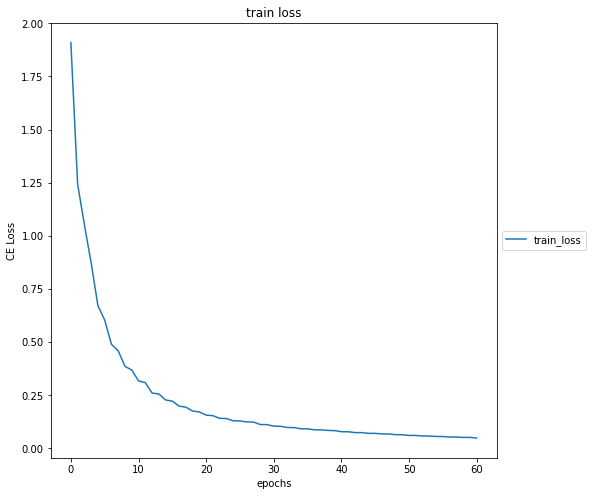

In [25]:
fig = plt.figure(figsize = (8,8)) 
vline_list = np.arange(every_what_epoch, epoch + every_what_epoch, every_what_epoch)
# train_loss = np.random.randn(340)
# test_loss = np.random.randn(340)
epoch_list = np.arange(0, epoch+2)
plt.plot(epoch_list,loss_curi_tr, label='train_loss')
#plt.plot(epoch_list,loss_curi_tst, label='test_loss')

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel("epochs")
plt.ylabel("CE Loss")
#plt.vlines(vline_list,min(min(loss_curi_tr),min(loss_curi_tst)), max(max(loss_curi_tst),max(loss_curi_tr)),linestyles='dotted')
plt.title("train loss")
plt.show()
fig.savefig("train_loss_every_1_plot.pdf")
fig.savefig("train_loss_every_1_plot.png")

In [26]:
analysis_data_tr

array([[ 163,  834, 1624,  379,  433, 2567],
       [ 322,  680, 1972,   26, 1774, 1226],
       [1084,  573, 1210,  133, 1774, 1226],
       [1402,  676,  909,   13, 2465,  535],
       [1792,  686,  519,    3, 2465,  535],
       [1924,  680,  393,    3, 2522,  478],
       [2026,  680,  291,    3, 2522,  478],
       [2079,  672,  248,    1, 2580,  420],
       [2091,  672,  236,    1, 2580,  420],
       [2145,  640,  215,    0, 2556,  444],
       [2150,  640,  210,    0, 2556,  444],
       [2303,  494,  202,    1, 2519,  481],
       [2371,  495,  134,    0, 2519,  481],
       [2346,  520,  134,    0, 2504,  496],
       [2358,  520,  122,    0, 2504,  496],
       [2480,  393,  127,    0, 2548,  452],
       [2531,  393,   76,    0, 2548,  452],
       [2628,  292,   80,    0, 2525,  475],
       [2609,  292,   99,    0, 2525,  475],
       [2740,  159,  101,    0, 2588,  412],
       [2772,  159,   69,    0, 2588,  412],
       [2853,   66,   81,    0, 2711,  289],
       [28

In [27]:
analysis_data_tst

array([[ 117,  496, 1117,  270,  285, 1715],
       [ 179,  454, 1358,    9, 1221,  779],
       [ 727,  369,  810,   94, 1221,  779],
       [ 895,  451,  651,    3, 1637,  363],
       [1191,  449,  355,    5, 1637,  363],
       [1279,  454,  266,    1, 1670,  330],
       [1351,  455,  194,    0, 1670,  330],
       [1393,  445,  162,    0, 1707,  293],
       [1406,  445,  149,    0, 1707,  293],
       [1428,  437,  135,    0, 1699,  301],
       [1431,  437,  132,    0, 1699,  301],
       [1550,  333,  116,    1, 1692,  308],
       [1587,  333,   79,    1, 1692,  308],
       [1571,  352,   77,    0, 1688,  312],
       [1581,  352,   67,    0, 1688,  312],
       [1670,  259,   70,    1, 1683,  317],
       [1692,  259,   48,    1, 1683,  317],
       [1767,  181,   52,    0, 1680,  320],
       [1765,  181,   54,    0, 1680,  320],
       [1845,   98,   57,    0, 1735,  265],
       [1857,   98,   45,    0, 1735,  265],
       [1913,   38,   48,    1, 1815,  185],
       [19

In [28]:
columns = ["epochs", "argmax > 0.5" ,"argmax < 0.5", "focus_true_pred_true", "focus_false_pred_true", "focus_true_pred_false", "focus_false_pred_false" ]
df_train = pd.DataFrame()
df_test = pd.DataFrame()
df_train[columns[0]] = np.arange(0,epoch+2)
df_train[columns[1]] = analysis_data_tr[:,-2]
df_train[columns[2]] = analysis_data_tr[:,-1]
df_train[columns[3]] = analysis_data_tr[:,0]/30
df_train[columns[4]] = analysis_data_tr[:,1]/30
df_train[columns[5]] = analysis_data_tr[:,2]/30
df_train[columns[6]] = analysis_data_tr[:,3]/30

df_test[columns[0]] = np.arange(0,epoch+2)
df_test[columns[1]] = analysis_data_tst[:,-2]
df_test[columns[2]] = analysis_data_tst[:,-1]
df_test[columns[3]] = analysis_data_tst[:,0]/20
df_test[columns[4]] = analysis_data_tst[:,1]/20
df_test[columns[5]] = analysis_data_tst[:,2]/20
df_test[columns[6]] = analysis_data_tst[:,3]/20

In [29]:
df_train

,epochs,argmax > 0.5,argmax < 0.5,focus_true_pred_true,focus_false_pred_true,focus_true_pred_false,focus_false_pred_false
0,0,433,2567,5.433333,27.800000,54.133333,12.633333
1,1,1774,1226,10.733333,22.666667,65.733333,0.866667
2,2,1774,1226,36.133333,19.100000,40.333333,4.433333
3,3,2465,535,46.733333,22.533333,30.300000,0.433333
4,4,2465,535,59.733333,22.866667,17.300000,0.100000
...,...,...,...,...,...,...,...
56,56,2988,12,99.366667,0.000000,0.633333,0.000000
57,57,2988,12,99.366667,0.000000,0.633333,0.000000
58,58,2988,12,99.233333,0.000000,0.766667,0.000000
59,59,2989,11,99.266667,0.000000,0.733333,0.000000


In [30]:
df_test

,epochs,argmax > 0.5,argmax < 0.5,focus_true_pred_true,focus_false_pred_true,focus_true_pred_false,focus_false_pred_false
0,0,285,1715,5.85,24.80,55.85,13.50
1,1,1221,779,8.95,22.70,67.90,0.45
2,2,1221,779,36.35,18.45,40.50,4.70
3,3,1637,363,44.75,22.55,32.55,0.15
4,4,1637,363,59.55,22.45,17.75,0.25
...,...,...,...,...,...,...,...
56,56,1995,5,99.55,0.00,0.45,0.00
57,57,1995,5,99.55,0.00,0.45,0.00
58,58,1995,5,99.45,0.00,0.55,0.00
59,59,1996,4,99.45,0.00,0.55,0.00


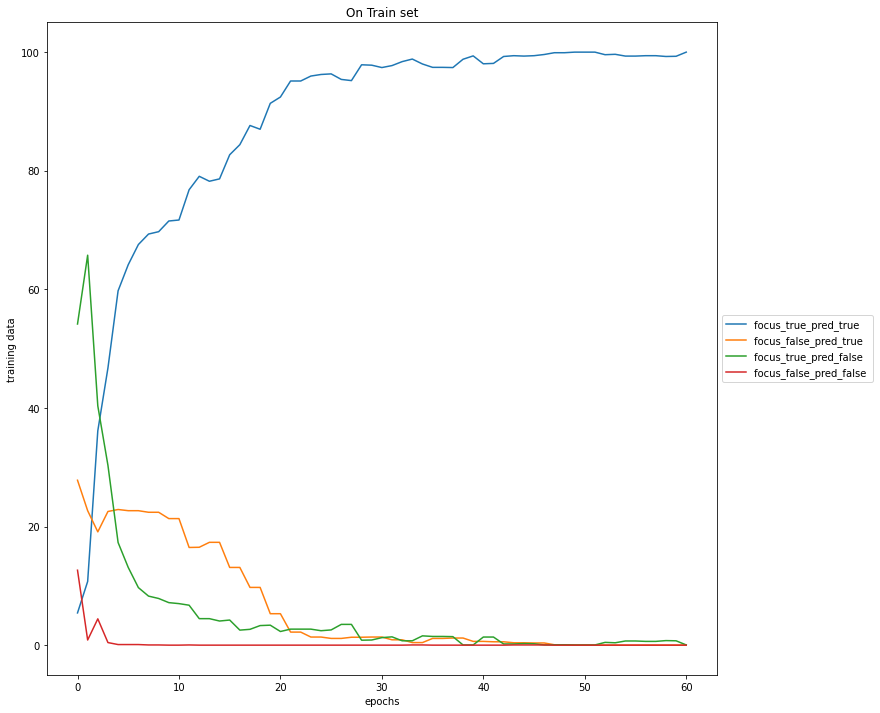

In [33]:
# plt.figure(figsize=(12,12))
# plt.plot(df_train[columns[0]],df_train[columns[1]], label='argmax > 0.5')
# plt.plot(df_train[columns[0]],df_train[columns[2]], label='argmax < 0.5')

# plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# plt.xlabel("epochs")
# plt.ylabel("training data")
# plt.title("On Training set")
# #plt.vlines(vline_list,min(min(df_train[columns[1]]),min(df_train[columns[2]])), max(max(df_train[columns[1]]),max(df_train[columns[2]])),linestyles='dotted')
# plt.show()

fig = plt.figure(figsize=(12,12))
plt.plot(df_train[columns[0]],df_train[columns[3]], label ="focus_true_pred_true ")
plt.plot(df_train[columns[0]],df_train[columns[4]], label ="focus_false_pred_true ")
plt.plot(df_train[columns[0]],df_train[columns[5]], label ="focus_true_pred_false ")
plt.plot(df_train[columns[0]],df_train[columns[6]], label ="focus_false_pred_false ")
plt.title("On Train set")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel("epochs")
plt.ylabel("training data")
#plt.vlines(vline_list,min(min(df_train[columns[3]]),min(df_train[columns[4]]),min(df_train[columns[5]]),min(df_train[columns[6]])), max(max(df_train[columns[3]]),max(df_train[columns[4]]),max(df_train[columns[5]]),max(df_train[columns[6]])),linestyles='dotted')
plt.show()
fig.savefig("train_analysis_every_1.pdf")
fig.savefig("train_analysis_every_1.png")

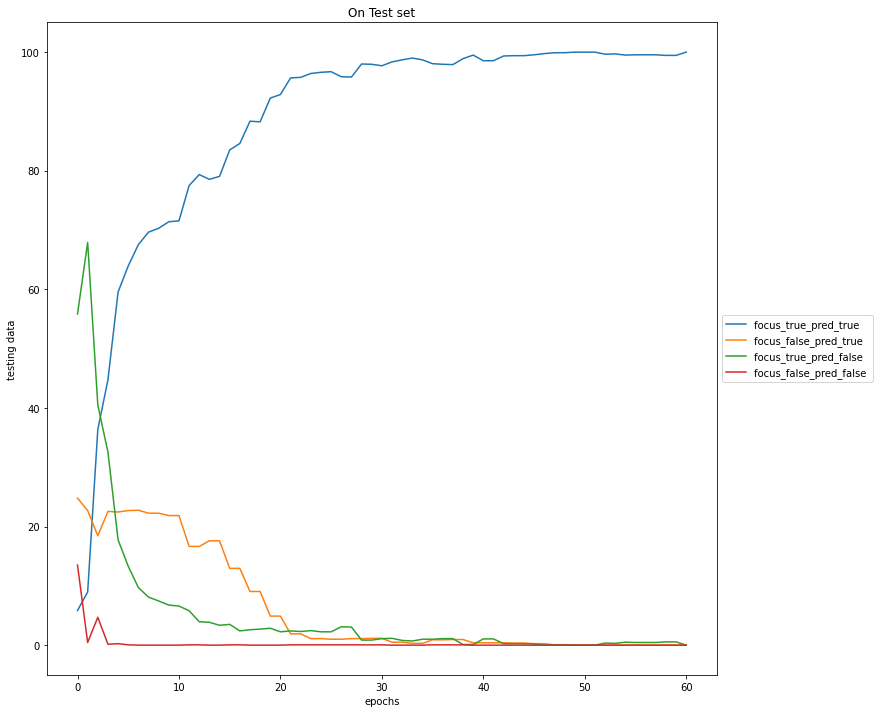

In [34]:
# plt.figure(figsize=(12,12))
# plt.plot(df_test[columns[0]],df_test[columns[1]], label='argmax > 0.5')
# plt.plot(df_test[columns[0]],df_test[columns[2]], label='argmax < 0.5')

# plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# plt.xlabel("epochs")
# plt.ylabel("test data")
# plt.title("On Testing set")
# #plt.vlines(vline_list,min(min(df_test[columns[1]]),min(df_test[columns[2]])), max(max(df_test[columns[1]]),max(df_test[columns[2]])),linestyles='dotted')
# plt.show()

fig = plt.figure(figsize=(12,12))
plt.plot(df_test[columns[0]],df_test[columns[3]], label ="focus_true_pred_true ")
plt.plot(df_test[columns[0]],df_test[columns[4]], label ="focus_false_pred_true ")
plt.plot(df_test[columns[0]],df_test[columns[5]], label ="focus_true_pred_false ")
plt.plot(df_test[columns[0]],df_test[columns[6]], label ="focus_false_pred_false ")
plt.title("On Test set")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel("epochs")
plt.ylabel("testing data")
#plt.vlines(vline_list,min(min(df_test[columns[3]]),min(df_test[columns[4]]),min(df_test[columns[5]]),min(df_test[columns[6]])), max(max(df_test[columns[3]]),max(df_test[columns[4]]),max(df_test[columns[5]]),max(df_test[columns[6]])),linestyles='dotted')
plt.show()
fig.savefig("test_analysis_every_1.pdf")
fig.savefig("test_analysis_every_1.png")